<a href="https://colab.research.google.com/github/Aashrit77/Assignments/blob/main/SimpleLineaeRegression_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv("/content/delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.shape

(21, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
datanew = data.rename({"Delivery Time":"DeleveryT"},axis=1)


In [9]:
datanew.head()

,DeleveryT,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
data1 = datanew.rename({"Sorting Time":"SortingT"},axis=1)
data1.head()

,DeleveryT,SortingT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
model = smf.ols("DeleveryT~SortingT",data=data1).fit()

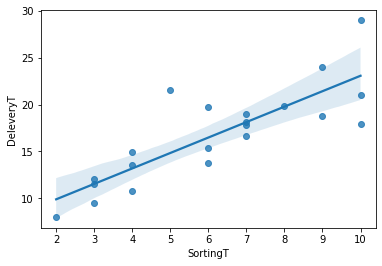

In [13]:
sns.regplot(x="SortingT",y="DeleveryT",data=data1)

In [14]:
model.params

Intercept    6.582734
SortingT     1.649020
dtype: float64

In [15]:
model.rsquared

0.6822714748417231

In [16]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


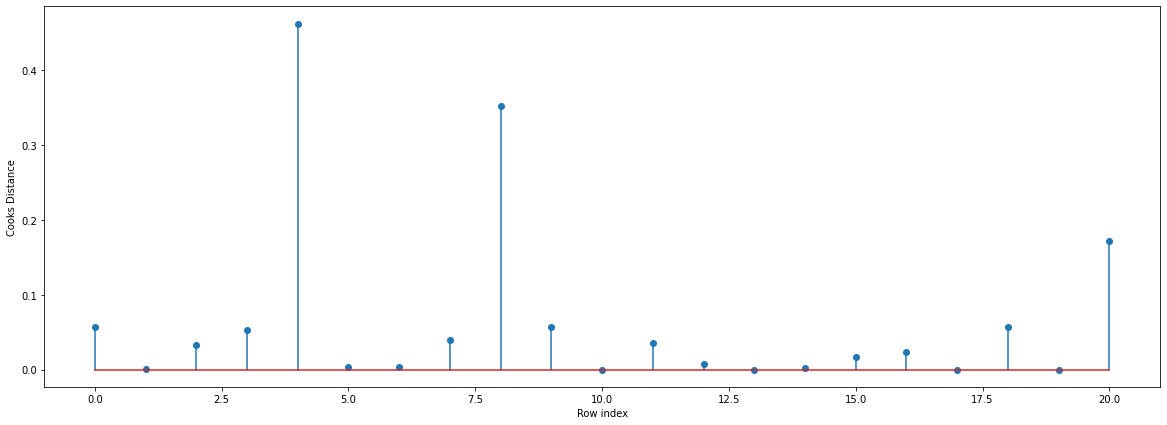

In [17]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [18]:
(np.argmax(c),np.max(c))

(4, 0.462053041265031)

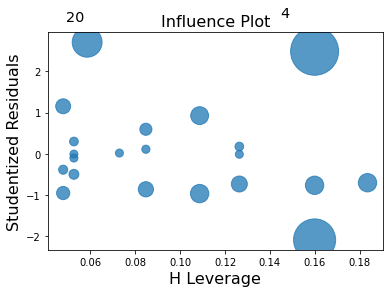

In [19]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [21]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.42857142857142855

In [28]:
data1_new = data1.drop(data1.index[[4]],axis=0).reset_index()

In [29]:
data1_new = data1_new.drop(["index"],axis=1)


In [31]:
data1_new.head()

,DeleveryT,SortingT
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6


In [32]:
model1 = smf.ols("DeleveryT~SortingT",data=data1_new).fit()

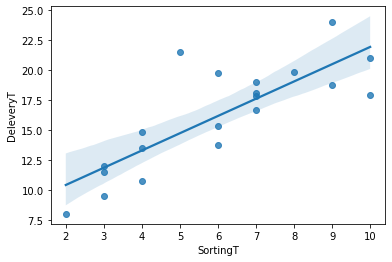

In [33]:
sns.regplot(x="SortingT",y="DeleveryT",data=data1_new)

In [35]:
model1.rsquared

0.660207261776224

In [41]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


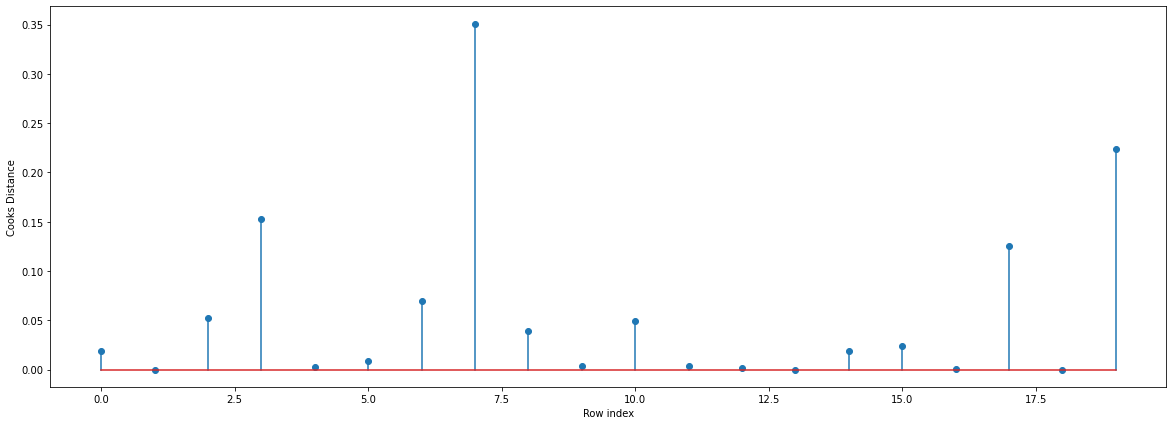

In [42]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(7, 0.3508974803877862)

In [44]:
data2_new = data1_new.drop(data1_new.index[[7,19]],axis=0).reset_index()

In [45]:
data2_new = data2_new.drop(["index"],axis=1)

In [46]:
model2 = smf.ols("DeleveryT~SortingT",data=data2_new).fit()

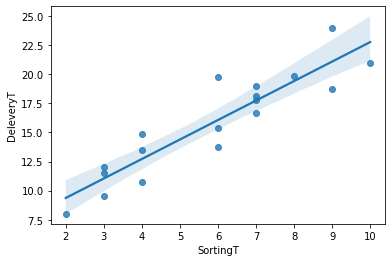

In [47]:
sns.regplot(x="SortingT",y="DeleveryT",data=data2_new)

In [48]:
model2.rsquared

0.8332330202945817

#As the Rsquared value is now better  we can use this to predict the model

In [49]:
new = pd.Series([5])
prep = pd.DataFrame(new,columns=["SortingT"])

In [50]:
model.predict(prep)

0    14.827833
dtype: float64